 TopKWords  VarianceThreshold  NumFeatures           ARI
       300       0.0000015000          143  0.2874962303
       350       0.0000017000          138  0.2823246456
       950       0.0000019000          139  0.2707689548
      1000       0.0000019000          139  0.2707689548
       400       0.0000013000          163  0.2689255721
       350       0.0000016000          141  0.2661335794
       350       0.0000018000          127  0.2620771432
      1000       0.0000022000          119  0.2522522737
       950       0.0000022000          119  0.2522522737
       350       0.0000013000          159  0.2472999647
       400       0.0000017000          141  0.2369265886
       150       0.0000013000          123  0.2245360130
       550       0.0000021000          119  0.2245132646
       350       0.0000012000          168  0.2192615592
       350       0.0000021000          113  0.2153234776
       250       0.0000024000           93  0.2143134773
       250       0.0000021000  

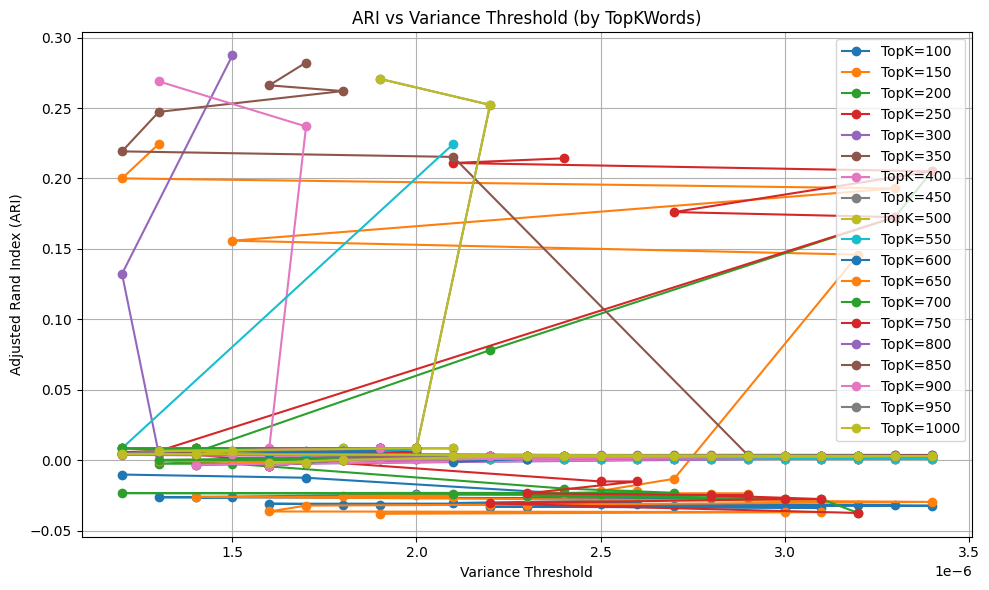

In [30]:
import json
import os
import numpy as np
import pandas as pd
from collections import Counter
from itertools import product
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# === Load pre-tokenized texts ===
with open("all_text_tokens_dict2.json", encoding="utf-8") as f:
    all_text_tokens = json.load(f)

texts = list(all_text_tokens.values())
file_list = list(all_text_tokens.keys())

# === Load labels from folder path ===
folder_path = "corpus318"  # modify if needed
file_folder_mapping = {}
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.endswith(".txt"):
            file_folder_mapping[file_name[:-4]] = os.path.basename(root)

labels = [file_folder_mapping.get(fn, "unknown") for fn in file_list]
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# === Build global word frequency
flat_tokens = [token for tokens in texts for token in tokens]
word_counts = Counter(flat_tokens)

# === Function to build DTM from top-k frequent words ===
def create_dtm(top_k, texts):
    vocab = [w for w, _ in word_counts.most_common(top_k)]
    vectors = []
    for tokens in texts:
        counter = Counter(tokens)
        total = len(tokens)
        vector = [counter[word] / total if total > 0 else 0 for word in vocab]
        vectors.append(vector)
    return pd.DataFrame(vectors, columns=vocab)

# === Parameter search space ===
top_k_list = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

variance_threshold_list = np.arange(1.2e-6, 3.5e-6, 1e-7).tolist()  # around 1.5e-6

results = []

# === Grid search ===
for top_k, var_thresh in product(top_k_list, variance_threshold_list):
    df_vectors = create_dtm(top_k, texts)
    X = df_vectors.values

    # Variance filter
    var_filter = VarianceThreshold(threshold=var_thresh)
    X_var = var_filter.fit_transform(X)

    if X_var.shape[1] == 0:
        print(f"Skipped: top_k={top_k}, var_thresh={var_thresh} removed all features.")
        continue

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_var)

    # HCA + clustering
    Z = linkage(X_scaled, method="ward")
    cluster_labels = fcluster(Z, t=len(set(y_encoded)), criterion="maxclust")
    ari = adjusted_rand_score(y_encoded, cluster_labels)

    results.append({
        "TopKWords": top_k,
        "VarianceThreshold": var_thresh,
        "NumFeatures": X_var.shape[1],
        "ARI": ari
    })

# === Output results ===
df_results = pd.DataFrame(results).sort_values(by="ARI", ascending=False)
print(df_results.to_string(index=False))

# === Best configuration
best = df_results.iloc[0]
print("\nBest setting:")
print(best)

# === Optional: plot ARI vs variance threshold for each top_k
plt.figure(figsize=(10, 6))
for top_k in top_k_list:
    subset = df_results[df_results['TopKWords'] == top_k]
    plt.plot(subset['VarianceThreshold'], subset['ARI'], marker='o', label=f"TopK={top_k}")

plt.xlabel("Variance Threshold")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("ARI vs Variance Threshold (by TopKWords)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 TopKWords  VarianceThreshold  NumFeatures           ARI
       100       0.0000012000           37  1.0000000000
       600       0.0000018000           52  1.0000000000
       600       0.0000016000           56  1.0000000000
       600       0.0000015000           58  1.0000000000
       600       0.0000014000           60  1.0000000000
       600       0.0000013000           68  1.0000000000
       600       0.0000012000           75  1.0000000000
       550       0.0000019000           51  1.0000000000
       550       0.0000018000           52  1.0000000000
       550       0.0000017000           53  1.0000000000
       100       0.0000013000           35  1.0000000000
       550       0.0000015000           58  1.0000000000
       550       0.0000014000           60  1.0000000000
       550       0.0000013000           67  1.0000000000
       550       0.0000012000           74  1.0000000000
       500       0.0000018000           51  1.0000000000
       500       0.0000017000  

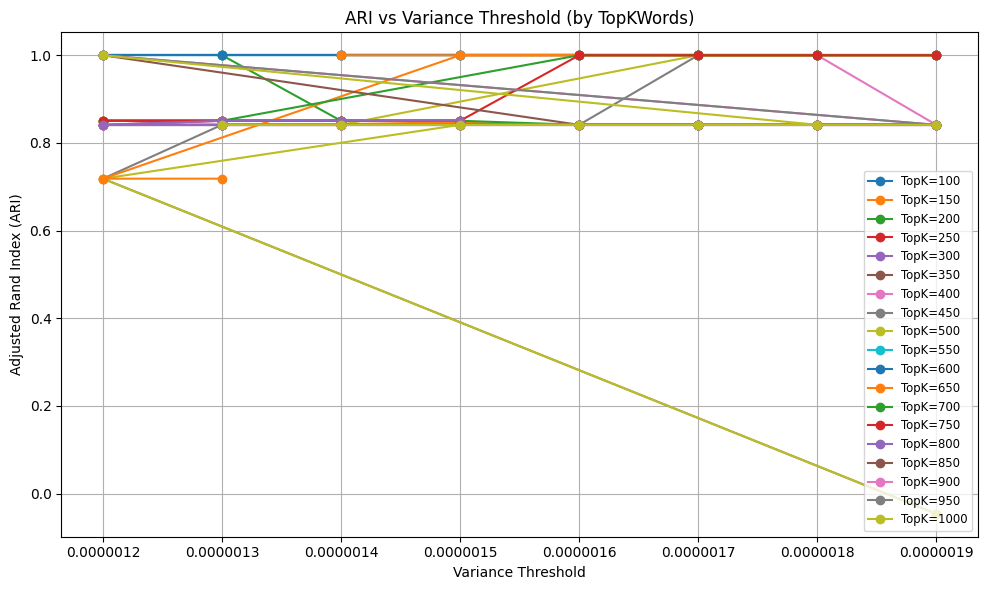

In [2]:
import json
import os
import numpy as np
import pandas as pd
from collections import Counter
from itertools import product
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# === Load pre-tokenized texts ===
with open("all_Lin_tokens.json", encoding="utf-8") as f:
    all_text_tokens = json.load(f)

texts = list(all_text_tokens.values())
file_list = list(all_text_tokens.keys())

# === Load labels from folder structure ===
folder_path = "Lin"
file_folder_mapping = {}
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.endswith(".txt"):
            file_folder_mapping[file_name[:-4]] = os.path.basename(root)

labels = [file_folder_mapping.get(fn, "unknown") for fn in file_list]
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# === Build global word frequency ===
flat_tokens = [token for tokens in texts for token in tokens]
word_counts = Counter(flat_tokens)

# === Function to build DTM from top-k frequent words ===
def create_dtm(top_k, texts):
    vocab = [w for w, _ in word_counts.most_common(top_k)]
    vectors = []
    for tokens in texts:
        counter = Counter(tokens)
        total = len(tokens)
        vector = [counter[word] / total if total > 0 else 0 for word in vocab]
        vectors.append(vector)
    return pd.DataFrame(vectors, columns=vocab)

# === Parameter grid ===
top_k_list = list(range(100, 1001, 50))  # every 50 from 100 to 1000
variance_threshold_list = np.arange(1.2e-6, 1.9e-6, 1e-7).tolist()  # fine-grained around 1.5e-6

results = []

# === Grid search ===
for top_k, var_thresh in product(top_k_list, variance_threshold_list):
    df_vectors = create_dtm(top_k, texts)
    X = df_vectors.values

    # Apply variance threshold
    var_filter = VarianceThreshold(threshold=var_thresh)
    X_var = var_filter.fit_transform(X)

    if X_var.shape[1] == 0:
        continue  # skip if all features are removed

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_var)

    # Hierarchical clustering
    Z = linkage(X_scaled, method="ward")
    cluster_labels = fcluster(Z, t=len(set(y_encoded)), criterion="maxclust")
    ari = adjusted_rand_score(y_encoded, cluster_labels)

    results.append({
        "TopKWords": top_k,
        "VarianceThreshold": var_thresh,
        "NumFeatures": X_var.shape[1],
        "ARI": ari
    })

# === Results DataFrame ===
df_results = pd.DataFrame(results)

# Format variance for visibility
df_results["VarianceThreshold"] = df_results["VarianceThreshold"].apply(lambda x: float(f"{x:.10f}"))
df_results = df_results.sort_values(by="ARI", ascending=False)

# === Print best result and full sorted table ===
pd.set_option("display.float_format", "{:.10f}".format)
print(df_results.to_string(index=False))

best = df_results.iloc[0]
print("\nBest configuration:")
print(best)

# === Optional: Plot ARI vs VarianceThreshold for each TopKWords ===
import matplotlib.ticker as mticker  # <-- Add this import at the top

# === Optional: Plot ARI vs VarianceThreshold for each TopKWords ===
plt.figure(figsize=(10, 6))
for top_k in sorted(df_results['TopKWords'].unique()):
    subset = df_results[df_results['TopKWords'] == top_k]
    plt.plot(subset['VarianceThreshold'], subset['ARI'], marker='o', label=f"TopK={top_k}")

plt.xlabel("Variance Threshold")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("ARI vs Variance Threshold (by TopKWords)")
plt.legend(loc="lower right", fontsize="small")
plt.grid(True)

# === Format x-axis to show full decimal values ===
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.7f'))  # e.g., 0.0000015000

plt.tight_layout()
plt.savefig("ari_vs_variance_threshold_Lin.png", dpi=300)
plt.show()



 TopKWords  VarianceThreshold  NumFeatures          ARI
       400       0.0000014000           88 0.9173433875
       800       0.0000013000          111 0.9173433875
       600       0.0000013000          103 0.9173433875
       900       0.0000013000          112 0.9173433875
      1000       0.0000013000          113 0.9173433875
       850       0.0000013000          111 0.9173433875
       700       0.0000013000          107 0.9173433875
       750       0.0000013000          111 0.9173433875
       650       0.0000013000          105 0.9173433875
       950       0.0000013000          113 0.9173433875
       350       0.0000012000           96 0.9114278671
       650       0.0000010000          136 0.9114278671
       650       0.0000011000          120 0.9114278671
       900       0.0000010000          144 0.9114278671
       900       0.0000011000          127 0.9114278671
       100       0.0000010000           75 0.9114278671
       350       0.0000011000          105 0.911

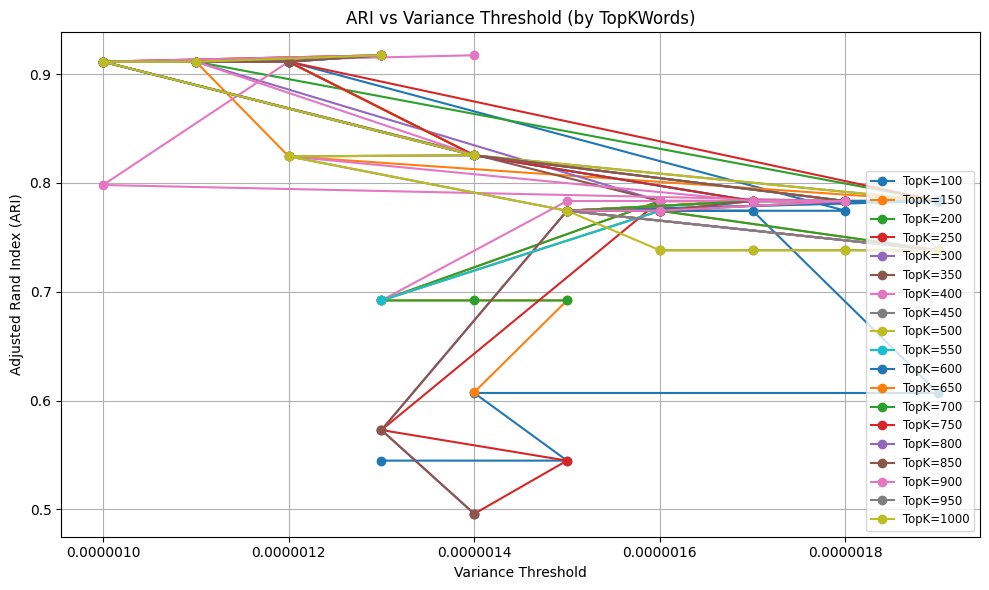

In [10]:
import json
import os
import numpy as np
import pandas as pd
from collections import Counter
from itertools import product
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# === Load pre-tokenized texts ===
with open("all_author4new_tokens.json", encoding="utf-8") as f:
    all_text_tokens = json.load(f)

texts = list(all_text_tokens.values())
file_list = list(all_text_tokens.keys())

# === Load labels from folder structure ===
folder_path = "Author4"
file_folder_mapping = {}
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.endswith(".txt"):
            file_folder_mapping[file_name[:-4]] = os.path.basename(root)

labels = [file_folder_mapping.get(fn, "unknown") for fn in file_list]
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# === Build global word frequency ===
flat_tokens = [token for tokens in texts for token in tokens]
word_counts = Counter(flat_tokens)

# === Function to build DTM from top-k frequent words ===
def create_dtm(top_k, texts):
    vocab = [w for w, _ in word_counts.most_common(top_k)]
    vectors = []
    for tokens in texts:
        counter = Counter(tokens)
        total = len(tokens)
        vector = [counter[word] / total if total > 0 else 0 for word in vocab]
        vectors.append(vector)
    return pd.DataFrame(vectors, columns=vocab)

# === Parameter grid ===
top_k_list = list(range(100, 1001, 50))  # every 50 from 100 to 1000
variance_threshold_list = np.arange(1.0e-6, 1.9e-6, 1e-7).tolist()  # fine-grained around 1.5e-6

results = []

# === Grid search ===
for top_k, var_thresh in product(top_k_list, variance_threshold_list):
    df_vectors = create_dtm(top_k, texts)
    X = df_vectors.values

    # Apply variance threshold
    var_filter = VarianceThreshold(threshold=var_thresh)
    X_var = var_filter.fit_transform(X)

    if X_var.shape[1] == 0:
        continue  # skip if all features are removed

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_var)

    # Hierarchical clustering
    Z = linkage(X_scaled, method="ward")
    cluster_labels = fcluster(Z, t=len(set(y_encoded)), criterion="maxclust")
    ari = adjusted_rand_score(y_encoded, cluster_labels)

    results.append({
        "TopKWords": top_k,
        "VarianceThreshold": var_thresh,
        "NumFeatures": X_var.shape[1],
        "ARI": ari
    })

# === Results DataFrame ===
df_results = pd.DataFrame(results)

# Format variance for visibility
df_results["VarianceThreshold"] = df_results["VarianceThreshold"].apply(lambda x: float(f"{x:.10f}"))
df_results = df_results.sort_values(by="ARI", ascending=False)

# === Print best result and full sorted table ===
pd.set_option("display.float_format", "{:.10f}".format)
print(df_results.to_string(index=False))

best = df_results.iloc[0]
print("\nBest configuration:")
print(best)

# === Optional: Plot ARI vs VarianceThreshold for each TopKWords ===
import matplotlib.ticker as mticker  # <-- Add this import at the top

# === Optional: Plot ARI vs VarianceThreshold for each TopKWords ===
plt.figure(figsize=(10, 6))
for top_k in sorted(df_results['TopKWords'].unique()):
    subset = df_results[df_results['TopKWords'] == top_k]
    plt.plot(subset['VarianceThreshold'], subset['ARI'], marker='o', label=f"TopK={top_k}")

plt.xlabel("Variance Threshold")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("ARI vs Variance Threshold (by TopKWords)")
plt.legend(loc="lower right", fontsize="small")
plt.grid(True)

# === Format x-axis to show full decimal values ===
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.7f'))  # e.g., 0.0000015000

plt.tight_layout()
#plt.savefig("ari_vs_variance_threshold14.png", dpi=300)
plt.show()

